## GSAT trend patterns

In [1]:
# In[1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# %%
# define function
import src.SAT_function as data_process
import src.Data_Preprocess as preprocess

In [2]:
# import src.slurm_cluster as scluster
# client, scluster = scluster.init_dask_slurm_cluster()

In [3]:
def func_mk(x):
    """
    Mann-Kendall test for trend
    """
    results = data_process.apply_mannkendall(x)
    slope = results[0]
    p_val = results[1]
    return slope, p_val

In [4]:
# Input the observational trend
variable_name = ['10yr', '20yr', '30yr',  '40yr',  '50yr', '60yr', '70yr']

# Input the Observational forced trend (wrt MMEM GSAT)
dir_forced_input = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Figure1/data_revision/'

HadCRUT5_annual_forced_trend_da = {}
HadCRUT5_annual_forced_p_value_da = {}

for interval in variable_name:
    HadCRUT5_annual_forced_trend_da[interval] = xr.open_dataset(dir_forced_input + 'HadCRUT5_annual_forced_' + interval + '_trend.nc')
    HadCRUT5_annual_forced_p_value_da[interval] = xr.open_dataset(dir_forced_input + 'HadCRUT5_annual_forced_' + interval + '_p_value.nc')

In [5]:
# Input the MMEM annual trend
dir_model_in = '/work/mh0033/m301036/Land_surf_temp/Disentangling_OBS_SAT_trend/Supp_Figure2_Forced/data/Smiles_ensemble/'
MMEM_annual_trend_da = {}
MMEM_annual_p_value_da = {}

for interval in variable_name:
    MMEM_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'MMEM_annual_forced_' + interval + '_trend.nc')
    MMEM_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'MMEM_annual_forced_' + interval + '_p_value.nc')
    
# CanESM5
CanESM5_annual_trend_da = {}
CanESM5_annual_p_value_da = {}

for interval in variable_name:
    CanESM5_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'CanESM5_annual_forced_' + interval + '_trend.nc')
    CanESM5_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'CanESM5_annual_forced_' + interval + '_p_value.nc')
# IPSL
IPSL_annual_trend_da = {}
IPSL_annual_p_value_da = {}

for interval in variable_name:
    IPSL_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'IPSL_annual_forced_' + interval + '_trend.nc')
    IPSL_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'IPSL_annual_forced_' + interval + '_p_value.nc')
    
# EC-Earth3
EC_Earth3_annual_trend_da = {}
EC_Earth3_annual_p_value_da = {}

for interval in variable_name:
    EC_Earth3_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'EC_Earth3_annual_forced_' + interval + '_trend.nc')
    EC_Earth3_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'EC_Earth3_annual_forced_' + interval + '_p_value.nc')
    
# ACCESS
ACCESS_annual_trend_da = {}
ACCESS_annual_p_value_da = {}

for interval in variable_name:
    ACCESS_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'ACCESS_annual_forced_' + interval + '_trend.nc')
    ACCESS_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'ACCESS_annual_forced_' + interval + '_p_value.nc')
# MPI-ESM1-2
MPI_ESM_annual_trend_da = {}
MPI_ESM_annual_p_value_da = {}

for interval in variable_name:
    MPI_ESM_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'MPI_ESM_annual_forced_' + interval + '_trend.nc')
    MPI_ESM_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'MPI_ESM_annual_forced_' + interval + '_p_value.nc')

# MIROC6
MIROC6_annual_trend_da = {}
MIROC6_annual_p_value_da = {}

for interval in variable_name:
    MIROC6_annual_trend_da[interval] = xr.open_dataset(dir_model_in + 'MIROC6_annual_forced_' + interval + '_trend.nc')
    MIROC6_annual_p_value_da[interval] = xr.open_dataset(dir_model_in + 'MIROC6_annual_forced_' + interval + '_p_value.nc')

In [6]:
HadCRUT5_annual_forced_trend_da['10yr']

<xarray.Dataset>
Dimensions:                        (lat: 90, lon: 180)
Coordinates:
  * lat                            (lat) float64 -89.0 -87.0 -85.0 ... 87.0 89.0
  * lon                            (lon) float64 0.0 2.0 4.0 ... 356.0 358.0
Data variables:
    __xarray_dataarray_variable__  (lat, lon) float64 ...

In [7]:
MMEM_annual_p_value_da['10yr']

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 90)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
    height   float64 ...
Data variables:
    tas      (lat, lon) float64 ...

In [8]:
# loop for the rest of the data
for interval in variable_name:
    # HadCRUT5
    HadCRUT5_annual_forced_trend_da[interval] = HadCRUT5_annual_forced_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    HadCRUT5_annual_forced_p_value_da[interval] = HadCRUT5_annual_forced_p_value_da[interval].rename({'__xarray_dataarray_variable__': 'p_value'})
    # MMEM
    MMEM_annual_trend_da[interval] = MMEM_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    MMEM_annual_p_value_da[interval] = MMEM_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # CanESM5
    CanESM5_annual_trend_da[interval] = CanESM5_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    CanESM5_annual_p_value_da[interval] = CanESM5_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # IPSL
    IPSL_annual_trend_da[interval] = IPSL_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    IPSL_annual_p_value_da[interval] = IPSL_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # EC-Earth3
    EC_Earth3_annual_trend_da[interval] = EC_Earth3_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    EC_Earth3_annual_p_value_da[interval] = EC_Earth3_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # ACCESS
    ACCESS_annual_trend_da[interval] = ACCESS_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    ACCESS_annual_p_value_da[interval] = ACCESS_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # MPI-ESM1-2
    MPI_ESM_annual_trend_da[interval] = MPI_ESM_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    MPI_ESM_annual_p_value_da[interval] = MPI_ESM_annual_p_value_da[interval].rename({'tas': 'p_value'})
    # MIROC6
    MIROC6_annual_trend_da[interval] = MIROC6_annual_trend_da[interval].rename({'__xarray_dataarray_variable__': 'annual_trend'})
    MIROC6_annual_p_value_da[interval] = MIROC6_annual_p_value_da[interval].rename({'tas': 'p_value'})
    

In [9]:
MMEM_annual_p_value_da['10yr']

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 90)
Coordinates:
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
    height   float64 ...
Data variables:
    p_value  (lat, lon) float64 ...

In [10]:
# check the min and max value of the trend
# HadCRUT5
for interval in variable_name:
    print('HadCRUT5', interval, 'min:', HadCRUT5_annual_forced_trend_da[interval].annual_trend.min().values, 'max:', HadCRUT5_annual_forced_trend_da[interval].annual_trend.max().values)

HadCRUT5 10yr min: -0.009674201213542372 max: 0.07605611776586874
HadCRUT5 20yr min: -0.009224368659832491 max: 0.07251964825022689
HadCRUT5 30yr min: -0.009604661486010411 max: 0.07550941405464438
HadCRUT5 40yr min: -0.008961017471241756 max: 0.07044924795865551
HadCRUT5 50yr min: -0.00809032409600384 max: 0.06360407734215466
HadCRUT5 60yr min: -0.0073507803808035115 max: 0.057789972109616464
HadCRUT5 70yr min: -0.006487666511140626 max: 0.051004389644725964


### Plotting with the Robinson Projections

In [11]:
plt.rcParams['figure.figsize'] = (8, 10)
plt.rcParams['font.size'] = 16
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.right'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.bottom'] = True

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as mticker
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

def plot_trend_with_significance(trend_data, lats, lons, p_values, levels=None, extend=None, cmap=None, 
                                 title="", ax=None, show_xticks=False, show_yticks=False):
    """
    Plot the trend spatial pattern using Robinson projection with significance overlaid.

    Parameters:
    - trend_data: 2D numpy array with the trend values.
    - lats, lons: 1D arrays of latitudes and longitudes.
    - p_values: 2D array with p-values for each grid point.
    - GMST_p_values: 2D array with GMST p-values for each grid point.
    - title: Title for the plot.
    - ax: Existing axis to plot on. If None, a new axis will be created.
    - show_xticks, show_yticks: Boolean flags to show x and y axis ticks.
    
    Returns:
    - contour_obj: The contour object from the plot.
    """

    # Create a new figure/axis if none is provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 15), subplot_kw={'projection': ccrs.Robinson()})
        ax.set_global()
  
    # Determine significance mask (where p-values are less than 0.10)
    insignificance_mask = p_values >= 0.10
    
    # Plotting
    # contour_obj = ax.pcolormesh(lons, lats, trend_data,  cmap='RdBu_r',vmin=-5.0, vmax=5.0, transform=ccrs.PlateCarree(central_longitude=180), shading='auto')
    contour_obj = ax.contourf(lons, lats, trend_data, levels=levels, extend=extend, cmap=cmap, transform=ccrs.PlateCarree(central_longitude=0))

    # Plot significance masks with different hatches
    ax.contourf(lons, lats, insignificance_mask, levels=[0, 0.10, 1.0],hatches=[None,'///'], colors='none', transform=ccrs.PlateCarree())

    ax.coastlines(resolution='110m')
    gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,
                      color='gray', alpha=0.35, linestyle='--')

    # Disable labels on the top and right of the plot
    gl.top_labels = False
    gl.right_labels = False

    # Enable labels on the bottom and left of the plot
    gl.bottom_labels = show_xticks
    gl.left_labels = show_yticks
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    gl.xlabel_style = {'size': 18}
    gl.ylabel_style = {'size': 18}
    
    if show_xticks:
        gl.bottom_labels = True
    if show_yticks:
        gl.left_labels = True
    
    ax.set_title(title, loc='center', fontsize=20, fontweight='bold', pad=5.0)

    return contour_obj


In [12]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

intervals = [-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9, 1.1, 1.3]

# Normalizing the intervals to [0, 1]
min_interval = min(intervals)
max_interval = max(intervals)
normalized_intervals = [(val - min_interval) / (max_interval - min_interval) for val in intervals]

cmap=mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)

# Define the colors at each interval
colors = [(0.00784313725490196, 0.2, 0.4627450980392157, 1.0),
    (0.00784313725490196, 0.2, 0.4627450980392157, 1.0),
    (0.023529411764705882, 0.32941176470588235, 0.5450980392156862, 1.0),
    (0.023529411764705882, 0.32941176470588235, 0.5450980392156862, 1.0),
    (1.0, 1.0, 1.0, 1.0),
    (1.0, 0.9, 0.98, 1.0),
    (1.0, 0.8, 0.5, 1.0),
    (1.0, 0.803921568627451, 0.607843137254902, 1.0), 
    (1.0, 0.6000000000000001, 0.20000000000000018, 1.0),
    (1.0, 0.4039215686274509, 0.0, 1.0),
    (0.8999999999999999, 0.19999999999999996, 0.0, 1.0),
    (0.7470588235294118, 0.0, 0.0, 1.0), 
    (0.6000000000000001, 0.0, 0.0, 1.0),
    (0.44705882352941173, 0.0, 0.0, 1.0),
    (0.30000000000000004, 0.0, 0.0, 1.0),
    (0.14705882352941177, 0.0, 0.0, 1.0),
    (0.0, 0.0, 0.0, 1.0)]

# Creating a list of tuples with normalized positions and corresponding colors
color_list = list(zip(normalized_intervals, colors))

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list('my_custom_cmap', color_list)

# Create a normalization
norm = Normalize(vmin=min_interval, vmax=max_interval)

### Plot the Original, Forced, MMEM trend patterns

In [13]:
HadCRUT5_annual_forced_trend_da['10yr']

<xarray.Dataset>
Dimensions:       (lat: 90, lon: 180)
Coordinates:
  * lat           (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon           (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Data variables:
    annual_trend  (lat, lon) float64 0.01048 0.01048 0.0105 ... 0.06503 0.06528

In [14]:
# arange data into a list arrocding to the variable name
trend_10yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['10yr'], 
            "MMEM":MMEM_annual_trend_da['10yr'],
           "MIROC6":MIROC6_annual_trend_da['10yr'],
           "MPI_ESM":MPI_ESM_annual_trend_da['10yr'],
           "ACCESS":ACCESS_annual_trend_da['10yr'], 
           "EC_Earth3":EC_Earth3_annual_trend_da['10yr'],
           "IPSL":IPSL_annual_trend_da['10yr'],
           "CanESM5":CanESM5_annual_trend_da['10yr']
            }

p_value_10yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['10yr'],
                "MMEM":MMEM_annual_p_value_da['10yr'],
                "MIROC6":MIROC6_annual_p_value_da['10yr'],
                "MPI_ESM":MPI_ESM_annual_p_value_da['10yr'],
                "ACCESS":ACCESS_annual_p_value_da['10yr'],
                "EC_Earth3":EC_Earth3_annual_p_value_da['10yr'],
                "IPSL":IPSL_annual_p_value_da['10yr'],
                "CanESM5":CanESM5_annual_p_value_da['10yr']
                }

trend_20yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['20yr'],
            "MMEM":MMEM_annual_trend_da['20yr'],
            "MIROC6":MIROC6_annual_trend_da['20yr'],
            "MPI_ESM":MPI_ESM_annual_trend_da['20yr'],
            "ACCESS":ACCESS_annual_trend_da['20yr'],
            "EC_Earth3":EC_Earth3_annual_trend_da['20yr'],
            "IPSL":IPSL_annual_trend_da['20yr'],
            "CanESM5":CanESM5_annual_trend_da['20yr']
            }

p_value_20yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['20yr'],
                "MMEM":MMEM_annual_p_value_da['20yr'],
               "MIROC6":MIROC6_annual_p_value_da['20yr'],
               "MPI_ESM":MPI_ESM_annual_p_value_da['20yr'], 
               "ACCESS":ACCESS_annual_p_value_da['20yr'],
               "EC_Earth3":EC_Earth3_annual_p_value_da['20yr'],
               "IPSL":IPSL_annual_p_value_da['20yr'],
               "CanESM5":CanESM5_annual_p_value_da['20yr']
                }

trend_30yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['30yr'],
            "MMEM":MMEM_annual_trend_da['30yr'],
            "MIROC6":MIROC6_annual_trend_da['30yr'],
            "MPI_ESM":MPI_ESM_annual_trend_da['30yr'],
            "ACCESS":ACCESS_annual_trend_da['30yr'],
            "EC_Earth3":EC_Earth3_annual_trend_da['30yr'],
            "IPSL":IPSL_annual_trend_da['30yr'],
            "CanESM5":CanESM5_annual_trend_da['30yr']
            }

p_value_30yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['30yr'],
                "MMEM":MMEM_annual_p_value_da['30yr'],
                "MIROC6":MIROC6_annual_p_value_da['30yr'],
                "MPI_ESM":MPI_ESM_annual_p_value_da['30yr'],
                "ACCESS":ACCESS_annual_p_value_da['30yr'],
                "EC_Earth3":EC_Earth3_annual_p_value_da['30yr'],
                "IPSL":IPSL_annual_p_value_da['30yr'],
                "CanESM5":CanESM5_annual_p_value_da['30yr']
                }

# trend_40yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['40yr'],
#             "MMEM":MMEM_annual_trend_da['40yr'],
#             "CanESM5":CanESM5_annual_trend_da['40yr'],
#             "IPSL":IPSL_annual_trend_da['40yr'],
#             "EC_Earth3":EC_Earth3_annual_trend_da['40yr'],
#             "ACCESS":ACCESS_annual_trend_da['40yr'],
#             "MPI_ESM":MPI_ESM_annual_trend_da['40yr'],
#             "MIROC6":MIROC6_annual_trend_da['40yr']}
# p_value_40yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['40yr'],
#                 "MMEM":MMEM_annual_p_value_da['40yr'],
#                 "CanESM5":CanESM5_annual_p_value_da['40yr'],
#                 "IPSL":IPSL_annual_p_value_da['40yr'],
#                 "EC_Earth3":EC_Earth3_annual_p_value_da['40yr'],
#                 "ACCESS":ACCESS_annual_p_value_da['40yr'],
#                 "MPI_ESM":MPI_ESM_annual_p_value_da['40yr'],
#                 "MIROC6":MIROC6_annual_p_value_da['40yr']}

# trend_50yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['50yr'],
#             "MMEM":MMEM_annual_trend_da['50yr'],
#             "CanESM5":CanESM5_annual_trend_da['50yr'],
#             "IPSL":IPSL_annual_trend_da['50yr'],
#             "EC_Earth3":EC_Earth3_annual_trend_da['50yr'],
#             "ACCESS":ACCESS_annual_trend_da['50yr'],
#             "MPI_ESM":MPI_ESM_annual_trend_da['50yr'],
#             "MIROC6":MIROC6_annual_trend_da['50yr']}
# p_value_50yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['50yr'],
#                 "MMEM":MMEM_annual_p_value_da['50yr'],
#                 "CanESM5":CanESM5_annual_p_value_da['50yr'],
#                 "IPSL":IPSL_annual_p_value_da['50yr'],
#                 "EC_Earth3":EC_Earth3_annual_p_value_da['50yr'],
#                 "ACCESS":ACCESS_annual_p_value_da['50yr'],
#                 "MPI_ESM":MPI_ESM_annual_p_value_da['50yr'],
#                 "MIROC6":MIROC6_annual_p_value_da['50yr']}

trend_60yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['60yr'], 
            "MMEM":MMEM_annual_trend_da['60yr'],
            "MIROC6":MIROC6_annual_trend_da['60yr'],
            "MPI_ESM":MPI_ESM_annual_trend_da['60yr'],
            "ACCESS":ACCESS_annual_trend_da['60yr'],
            "EC_Earth3":EC_Earth3_annual_trend_da['60yr'],
            "IPSL":IPSL_annual_trend_da['60yr'],
            "CanESM5":CanESM5_annual_trend_da['60yr']
            }
p_value_60yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['60yr'],
                "MMEM":MMEM_annual_p_value_da['60yr'],
                "MIROC6":MIROC6_annual_p_value_da['60yr'],
                "MPI_ESM":MPI_ESM_annual_p_value_da['60yr'],
                "ACCESS":ACCESS_annual_p_value_da['60yr'],
                "EC_Earth3":EC_Earth3_annual_p_value_da['60yr'],
                "IPSL":IPSL_annual_p_value_da['60yr'],
                "CanESM5":CanESM5_annual_p_value_da['60yr']
                }

# trend_70yr = {"HadCRUT5":HadCRUT5_annual_forced_trend_da['70yr'],
#             "MMEM":MMEM_annual_trend_da['70yr'],
#             "CanESM5":CanESM5_annual_trend_da['70yr'],
#             "IPSL":IPSL_annual_trend_da['70yr'],
#             "EC_Earth3":EC_Earth3_annual_trend_da['70yr'],
#             "ACCESS":ACCESS_annual_trend_da['70yr'],
#             "MPI_ESM":MPI_ESM_annual_trend_da['70yr'],
#             "MIROC6":MIROC6_annual_trend_da['70yr']}
# p_value_70yr = {"HadCRUT5":HadCRUT5_annual_forced_p_value_da['70yr'],
#                 "MMEM":MMEM_annual_p_value_da['70yr'],
#                 "CanESM5":CanESM5_annual_p_value_da['70yr'],
#                 "IPSL":IPSL_annual_p_value_da['70yr'],
#                 "EC_Earth3":EC_Earth3_annual_p_value_da['70yr'],
#                 "ACCESS":ACCESS_annual_p_value_da['70yr'],
#                 "MPI_ESM":MPI_ESM_annual_p_value_da['70yr'],
#                 "MIROC6":MIROC6_annual_p_value_da['70yr']}


In [15]:
trend_60yr

{'HadCRUT5': <xarray.Dataset>
 Dimensions:       (lat: 90, lon: 180)
 Coordinates:
   * lat           (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
   * lon           (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
 Data variables:
     annual_trend  (lat, lon) float64 0.00796 0.00796 0.007977 ... 0.04941 0.0496,
 'MMEM': <xarray.Dataset>
 Dimensions:       (lat: 90, lon: 180)
 Coordinates:
   * lat           (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
   * lon           (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
 Data variables:
     annual_trend  (lat, lon) float64 ...,
 'MIROC6': <xarray.Dataset>
 Dimensions:       (lat: 90, lon: 180)
 Coordinates:
   * lat           (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
   * lon           (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
 Data variables:
     annual_trend  (lat, lon) float64 ...,
 'MPI_ESM': <xarray.Dataset>
 Dimensions:       (la

In [16]:
# reattribute the units for the trend
variable_name = ["HadCRUT5", "MMEM", "MIROC6", "MPI_ESM", "ACCESS", "EC_Earth3", "IPSL", "CanESM5"]
# degC/60yr, 30yr, 10yr
for i in range(len(variable_name)):
    # trend_70yr[variable_name[i]] = trend_70yr[variable_name[i]]*10
    trend_60yr[variable_name[i]] = trend_60yr[variable_name[i]]*10
    # trend_50yr[variable_name[i]] = trend_50yr[variable_name[i]]*10
    # trend_40yr[variable_name[i]] = trend_40yr[variable_name[i]]*10
    trend_30yr[variable_name[i]] = trend_30yr[variable_name[i]]*10
    trend_20yr[variable_name[i]] = trend_20yr[variable_name[i]]*10
    trend_10yr[variable_name[i]] = trend_10yr[variable_name[i]]*10


In [17]:
# define an asymmetric colormap
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colors import BoundaryNorm
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

In [18]:
trend_10yr['HadCRUT5']['annual_trend'].shape

(90, 180)

In [19]:
p_value_10yr['HadCRUT5']['p_value'].shape

(90, 180)

In [20]:
# check the min and max of the trend
for i in range(len(variable_name)):
    print(trend_10yr[variable_name[i]]['annual_trend'].min().values, trend_10yr[variable_name[i]]['annual_trend'].max().values)
    print(trend_30yr[variable_name[i]]['annual_trend'].min().values, trend_30yr[variable_name[i]]['annual_trend'].max().values)
    print(trend_60yr[variable_name[i]]['annual_trend'].min().values, trend_60yr[variable_name[i]]['annual_trend'].max().values)

-0.09674201213542372 0.7605611776586874
-0.09604661486010412 0.7550941405464439
-0.07350780380803512 0.5778997210961646
-0.020069529612859092 2.2363940874735513
0.06995360056559245 1.9315045613508959
0.014449491395385233 1.3034528059264021
-0.808631032705307 1.8919837474822998
-0.30245816707611084 1.356852783097161
-0.23313370843728387 1.0279650262302973
-0.4144596060117086 1.2380084991455078
-0.1829899251461029 1.5939357406214663
-0.09437563627838126 1.262189479810851
-0.29262006282806396 2.1470284461975098
-0.3806338621222455 1.5194919374254015
-0.10566838381105455 0.9138151688412541
-1.2785165011882782 1.9171738624572754
0.003063721316201346 2.5476250648498535
-0.016150279845902345 1.250556339088239
-0.4410642385482788 2.193436622619629
0.06067991256713867 1.9117126294544764
-0.04122426758209865 1.3980965538080348
-0.29039323329925537 6.239791597638812
0.06169714033603668 4.908311937166297
0.05613702936314566 2.4603973012981992


In [21]:
# pattern correlation betwenn observed forced pattern vs. Model simulated forced pattern
import scipy.stats as stats

trend_pattern_correlation_10yr = []

for i in range(len(variable_name)):
    trend_pattern_correlation_10yr.append(stats.pearsonr(trend_10yr['HadCRUT5']['annual_trend'].values.flatten(), trend_10yr[variable_name[i]]['annual_trend'].values.flatten())[0])

trend_pattern_correlation_10yr 

[1.0,
 0.8195024605509359,
 0.6966406753538809,
 0.6271726177060919,
 0.7894148946402346,
 0.5342464744685708,
 0.7259379494118436,
 0.7169330251301583]

In [22]:
trend_pattern_correlation_30yr = []
for i in range(len(variable_name)):
    trend_pattern_correlation_30yr.append(stats.pearsonr(trend_30yr['HadCRUT5']['annual_trend'].values.flatten(), trend_30yr[variable_name[i]]['annual_trend'].values.flatten())[0])

trend_pattern_correlation_30yr

trend_pattern_correlation_60yr = []
for i in range(len(variable_name)):
    trend_pattern_correlation_60yr.append(stats.pearsonr(trend_60yr['HadCRUT5']['annual_trend'].values.flatten(), trend_60yr[variable_name[i]]['annual_trend'].values.flatten())[0])
print(trend_pattern_correlation_60yr)

[1.0, 0.8711581498687412, 0.8802895512660807, 0.8448393074067854, 0.8585948539308228, 0.8195984733912577, 0.8405226211967036, 0.7829055006073435]


In [23]:
# trend_pattern_correlation_20yr = []
# for i in range(len(variable_name)):
#     trend_pattern_correlation_20yr.append(stats.pearsonr(trend_20yr['HadCRUT5']['annual_trend'].values.flatten(), trend_20yr[variable_name[i]]['annual_trend'].values.flatten())[0])
# print(trend_pattern_correlation_20yr)
# trend_pattern_correlation_40yr = []
# for i in range(len(variable_name)):
#     trend_pattern_correlation_40yr.append(stats.pearsonr(trend_40yr['HadCRUT5']['annual_trend'].values.flatten(), trend_40yr[variable_name[i]]['annual_trend'].values.flatten())[0])

# trend_pattern_correlation_40yr

# trend_pattern_correlation_50yr = []
# for i in range(len(variable_name)):
#     trend_pattern_correlation_50yr.append(stats.pearsonr(trend_50yr['HadCRUT5']['annual_trend'].values.flatten(), trend_50yr[variable_name[i]]['annual_trend'].values.flatten())[0])

# trend_pattern_correlation_50yr

# trend_pattern_correlation_70yr = []
# for i in range(len(variable_name)):
#     trend_pattern_correlation_70yr.append(stats.pearsonr(trend_70yr['HadCRUT5']['annual_trend'].values.flatten(), trend_70yr[variable_name[i]]['annual_trend'].values.flatten())[0])

In [24]:
# save the correlation into one dictionary
# trend_pattern_correlation = {'10yr': trend_pattern_correlation_10yr, '20yr': trend_pattern_correlation_20yr, '30yr': trend_pattern_correlation_30yr, '40yr': trend_pattern_correlation_40yr, '50yr': trend_pattern_correlation_50yr, '60yr': trend_pattern_correlation_60yr, '70yr': trend_pattern_correlation_70yr}


In [25]:
# trend_pattern_correlation

In [26]:
# save the pattern correlation from the second to the last, which corresponds to the MMEM, CanESM5, IPSL, EC-Earth3, ACCESS, MPI-ESM, MIROC6
with open('pattern_correlations_ENS_Obs.txt', 'w') as file:
    file.write('10-year Trend Pattern Correlations:\n')
    for correlation in trend_pattern_correlation_10yr:
        file.write(f"{correlation}\n")

    file.write('\n30-year Trend Pattern Correlations:\n')
    for correlation in trend_pattern_correlation_30yr:
        file.write(f"{correlation}\n")

    file.write('\n60-year Trend Pattern Correlations:\n')
    for correlation in trend_pattern_correlation_60yr:
        file.write(f"{correlation}\n")

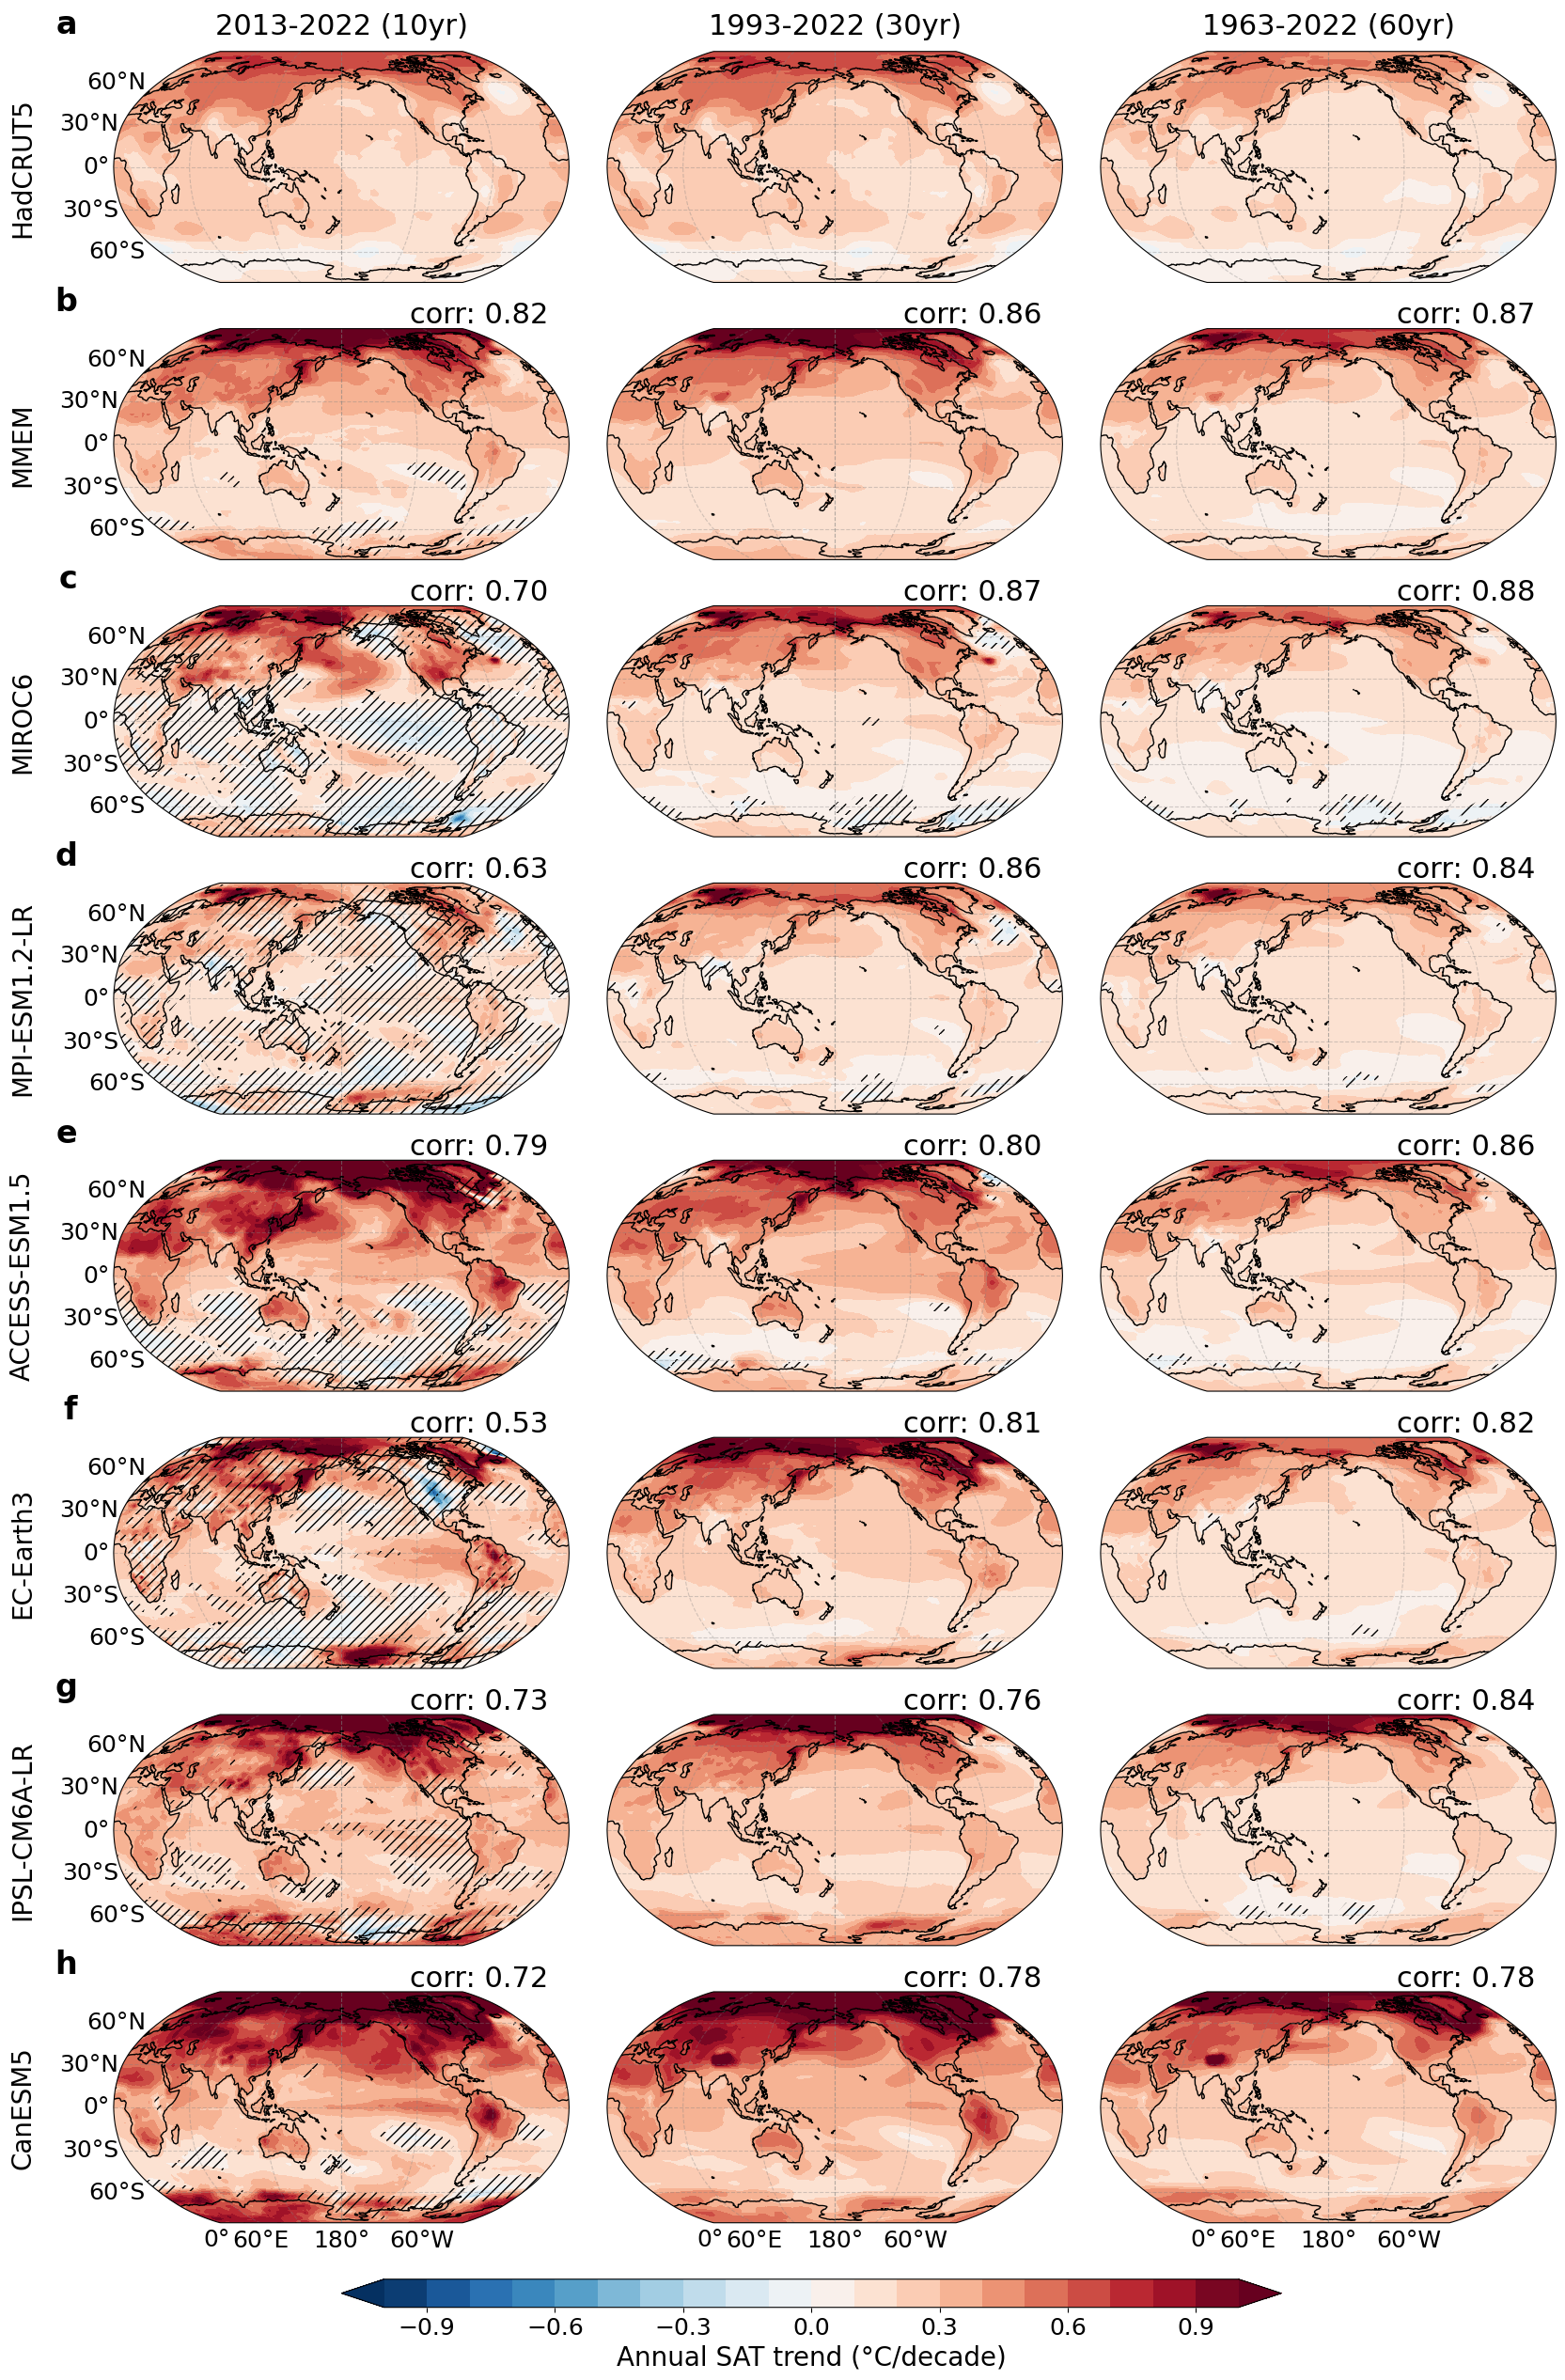

In [ ]:
# Plotting
lat = trend_60yr['HadCRUT5'].lat
lon = trend_60yr['HadCRUT5'].lon
lat, lon 

titles_rows = ["HadCRUT5", "MMEM", "MIROC6", "MPI-ESM1.2-LR","ACCESS-ESM1.5", "EC-Earth3", "IPSL-CM6A-LR", "CanESM5"]
rows_label = ["a", "b", "c", "d", "e", "f", "g", "h"]
titles_columns = ["2013-2022 (10yr)", "1993-2022 (30yr)", "1963-2022 (60yr)"]
# ["10-year (2013-2022)", "30-year (1993-2022)", "60-year (1963-2022)"]
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

periods = ["10yr", "30yr", "60yr"]
variable_name = ["HadCRUT5", "MMEM", "MIROC6", "MPI_ESM", "ACCESS", "EC_Earth3", "IPSL", "CanESM5"]

intervals = np.arange(-1.0, 1.1, 0.1)

cmap = mcolors.ListedColormap(palettable.cmocean.diverging.Balance_20.mpl_colors)
extend = 'both'

fig  = plt.figure(figsize=(20, 30))
gs = gridspec.GridSpec(8, 3, figure=fig,wspace=0.05, hspace=0.2)

# Create a 8x3 grid of subplots
axes = {}
for i, var in enumerate(variable_name):
    for j, period in enumerate(periods):
        is_left = j == 0
        is_bottom_row = i >= 7
        
        ax = plt.subplot(gs[i, j], projection=ccrs.Robinson(180))
        ax.set_global()
        axes[i, j] = ax
        if j == 0:
            # Add cyclic points
            trend_data = trend_10yr[variable_name[i]]['annual_trend']
            p_values = p_value_10yr[variable_name[i]]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                       levels=intervals, extend = extend,
                                                       cmap='RdBu_r', title=" ", ax=ax, 
                                                       show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 1:
            trend_data = trend_30yr[variable_name[i]]['annual_trend']
            p_values = p_value_30yr[variable_name[i]]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj1 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                        levels=intervals, extend = extend,
                                                        cmap='RdBu_r', title=" ", ax=ax, 
                                                        show_xticks = is_bottom_row, show_yticks = is_left)
        else:
            trend_data = trend_60yr[variable_name[i]]['annual_trend']
            p_values = p_value_60yr[variable_name[i]]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj2 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, 
                                                        levels=intervals, extend = extend,
                                                        cmap='RdBu_r', title=" ", ax=ax, 
                                                        show_xticks = is_bottom_row, show_yticks = is_left)

# add the title for each row
for i, var in enumerate(variable_name):
    axes[i, 0].text(-0.2, 0.5, titles_rows[i], va='center', ha='center', rotation=90, 
                    fontsize=20,transform=axes[i, 0].transAxes)
    axes[i, 0].text(-0.08, 1.05, rows_label[i], va='bottom', ha='right', rotation='horizontal',
                    fontsize=24, fontweight='bold', transform=axes[i, 0].transAxes)

# add the title for each column
for j in range(3):
    axes[0,j].text(0.5, 1.05, titles_columns[j], va='bottom', ha='center', rotation='horizontal', 
                   fontsize=22,transform=axes[0, j].transAxes)

# Add the pattern correlation text to the second to last rows of each column subplot
for i in np.arange(1,8,1):
    axes[i, 0].text(0.65, 1.0, f"corr: {trend_pattern_correlation_10yr[i]:.2f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 0].transAxes)
    axes[i, 1].text(0.65, 1.0, f"corr: {trend_pattern_correlation_30yr[i]:.2f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 1].transAxes)
    axes[i, 2].text(0.65, 1.0, f"corr: {trend_pattern_correlation_60yr[i]:.2f}", va='bottom', ha='left', fontsize=22,transform=axes[i, 2].transAxes)

# Add horizontal colorbars
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.01])
cbar = plt.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal', extend=extend)
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Annual SAT trend (°C/decade)', fontsize=20)

# plt.figure(constrained_layout=True)
fig.savefig('Extended-Fig-6.pdf',format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
client.close()
scluster.close()

In [ ]:
# Plotting
lat = trend_60yr['HadCRUT5'].lat
lon = trend_60yr['HadCRUT5'].lon
lat, lon 

titles = ["HadCRUT5", "MMEM"]
titles_column = ["a. 2013-2022(10yr)", "b. 2003-2022(20yr)", 
                 "c. 1993-2022(30yr)", "d. 1983-2022(40yr)", 
                 "e. 1973-2022(50yr)", "f. 1963-2022(60yr)", 
                 "g. 1953-2022(70yr)"]
import cartopy.util as cutil
import seaborn as sns
import matplotlib.colors as mcolors
import palettable

periods = ["10yr", "20yr", "30yr", "40yr", "50yr", "60yr", "70yr"]
variable_name = ["HadCRUT5", "MMEM"]
intervals = np.arange(-3.0, 3.25, 0.25)

fig  = plt.figure(figsize=(45, 6))
gs = gridspec.GridSpec(2, 7,height_ratios=[1, 1], width_ratios=[1, 1, 1, 1, 1, 1, 1])

axes = np.empty((2, 7), dtype=object)
for i, var in enumerate(variable_name):
    for j in range(7):
        is_left = (j % 7 == 0)
        is_bottom_row = i >= 1
        
        ax = plt.subplot(gs[i, j], projection=ccrs.Robinson(180))
        ax.set_global()
        axes[i, j] = ax
        
        # Plot the trend data with significance; Each column is a different period
        if j == 0:
            trend_data = trend_10yr[var]['annual_trend']
            p_values = p_value_10yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_10yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 1:
            trend_data = trend_20yr[var]['annual_trend']
            p_values = p_value_20yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj1 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_20yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 2:
            trend_data = trend_30yr[var]['annual_trend']
            p_values = p_value_30yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj2 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_30yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 3:
            trend_data = trend_40yr[var]['annual_trend']
            p_values = p_value_40yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj3 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_40yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 4:
            trend_data = trend_50yr[var]['annual_trend']
            p_values = p_value_50yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj4 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_50yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        elif j == 5:
            trend_data = trend_60yr[var]['annual_trend']
            p_values = p_value_60yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj5 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_60yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)
        else:
            trend_data = trend_70yr[var]['annual_trend']
            p_values = p_value_70yr[var]['p_value']
            trend_with_cyclic, lons_cyclic = cutil.add_cyclic_point(trend_data, coord=lon)
            p_values_with_cyclic, lons_cyclic = cutil.add_cyclic_point(p_values, coord=lon)
            
            contour_obj6 = plot_trend_with_significance(trend_with_cyclic, lat, lons_cyclic, p_values_with_cyclic, levels=intervals_70yr, 
                                                       cmap='twilight_shifted', title=titles[i], ax=ax, show_xticks = is_bottom_row, show_yticks = is_left)

# add the title for each column
for i, period in enumerate(periods):
    axes[0, i].text(0.15, 1.25, titles_column[i], fontsize=18, ha='center', va='center', transform=axes[0, i].transAxes)
    
# add 7 colorbar to each column's right;vertical
cbar_ax = fig.add_axes([0.2, 0.02, 0.5, 0.02])
cbar = fig.colorbar(contour_obj, cax=cbar_ax, orientation='horizontal',extend='both')
cbar.set_label('($^\circ$C/decade)', fontsize=18)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
fig.savefig('(Checked)Figure4-HadCRUT5-MMEM-Forced-trend-comparison.png', dpi=300, bbox_inches='tight')
plt.show()